In [ ]:
import pandas as pd
df=pd.read_csv('/content/AusOpen-men-2013.csv')
df

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Lukas Lacko,Novak Djokovic,1,0,0,3,61,35,39,18,...,4,8,8.0,9.0,101,6,7.0,6.0,NaN,NaN
1,Leonardo Mayer,Albert Montanes,1,1,3,0,61,31,39,13,...,0,0,NaN,NaN,42,1,3.0,1.0,NaN,NaN
2,Marcos Baghdatis,Denis Istomin,1,0,0,3,52,53,48,20,...,4,13,12.0,16.0,126,6,7.0,6.0,NaN,NaN
3,Dmitry Tursunov,Michael Russell,1,1,3,0,53,39,47,24,...,1,7,NaN,NaN,79,2,2.0,3.0,NaN,NaN
4,Juan Monaco,Ernests Gulbis,1,0,1,3,76,63,24,12,...,3,5,16.0,28.0,127,1,6.0,7.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Andy Murray,Roger Federer,5,0,1,3,61,60,39,28,...,4,17,49.0,66.0,147,6,6.0,6.0,6.0,NaN
122,Rafael Nadal,Grigor Dimitrov,5,1,3,1,73,66,27,22,...,3,6,28.0,41.0,132,6,6.0,6.0,2.0,NaN
123,Tomas Berdych,Stanislas Wawrinka,6,0,1,3,62,71,38,30,...,1,4,14.0,18.0,143,6,6.0,7.0,7.0,NaN
124,Rafael Nadal,Roger Federer,6,1,3,0,65,41,35,22,...,1,2,23.0,42.0,86,6,3.0,3.0,NaN,NaN


In [ ]:
import pandas as pd
df=pd.read_csv('/content/AusOpen-men-2013.csv')
dic={}
for index, row in df.iterrows():
  if row["Player1"] in dic.keys():
    dic[row["Player1"]]+=row["FNL1"]
  else:
    dic.update({row["Player1"]:row["FNL1"]})
  if row["Player2"] in dic.keys():
    dic[row["Player2"]]+=row["FNL2"]
  else:
    dic.update({row["Player2"]:row["FNL2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1], reverse=True)

print(a[:10])

[('Stanislas Wawrinka', 17), ('Rafael Nadal', 17), ('Tomas Berdych', 16), ('Roger Federer', 15), ('Novak Djokovic', 14), ('David Ferrer', 13), ('Andy Murray', 13), ('Grigor Dimitrov', 13), ('Florian Mayer', 10), ('Stephane Robert', 10)]


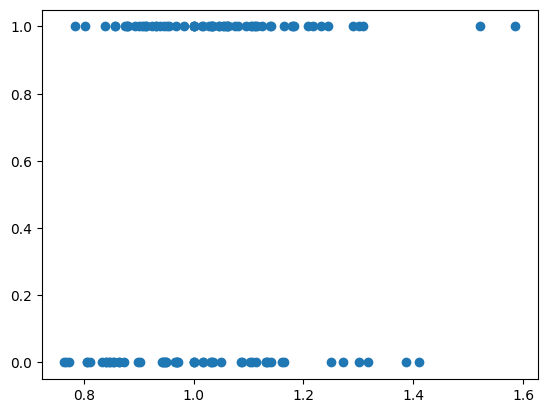

<Figure size 640x480 with 0 Axes>

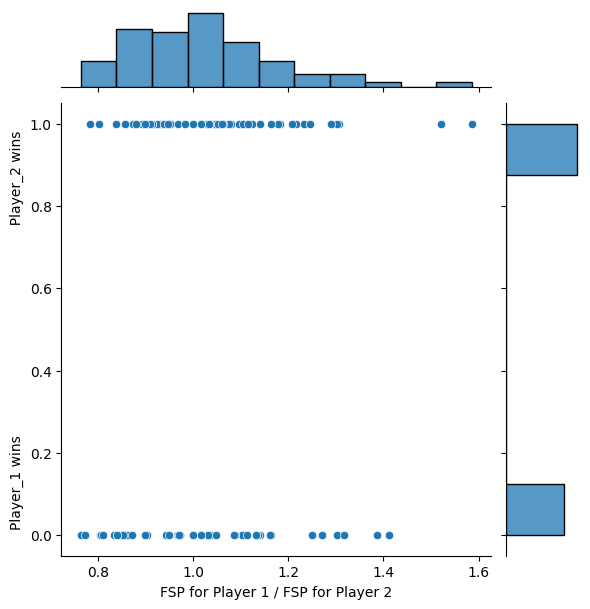

<Figure size 640x480 with 0 Axes>

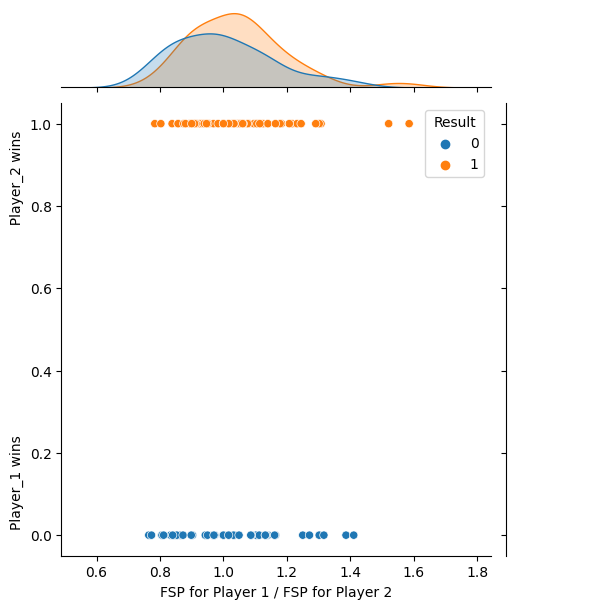

<Figure size 640x480 with 0 Axes>

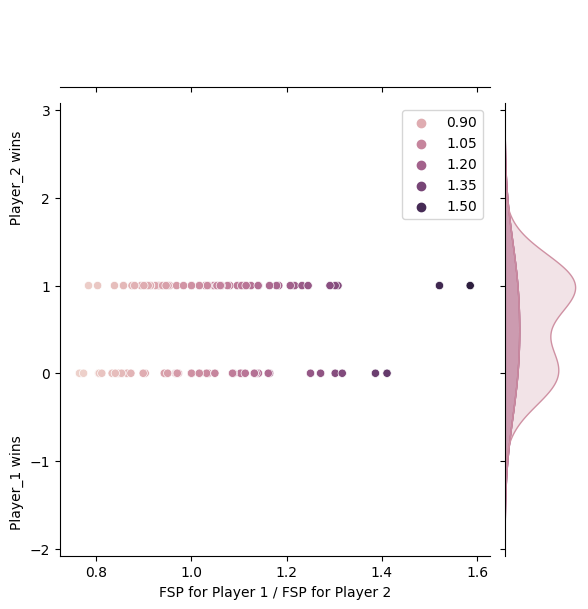

<Figure size 640x480 with 0 Axes>

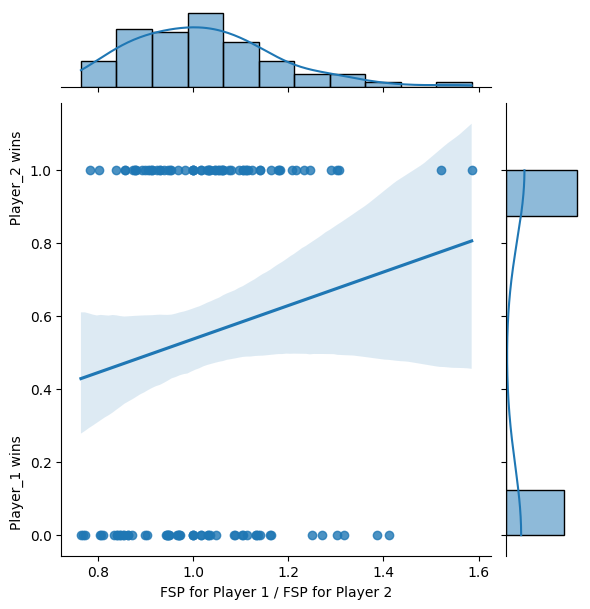

<Figure size 640x480 with 0 Axes>

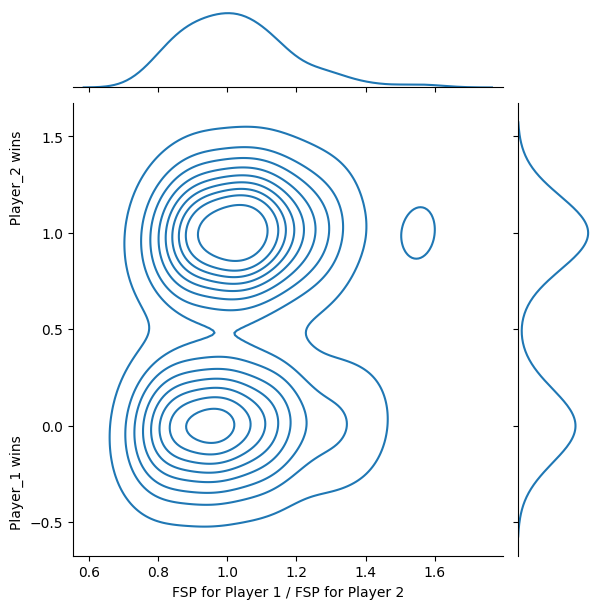

probability of winning given there is a first serve: 0.6417910447761194
probability of winning given there is a second serve: 0.3582089552238806
CORR: 0.04567445322956493
[('S.Lisicki', 441), ('M.Bartoli', 431), ('A.Radwanska', 424), ('K.Flipkens', 358), ('S.Stephens', 342), ('N.Li', 342), ('P.Kvitova', 272), ('S.Williams', 270), ('C.Suarez Navarro', 259), ('M.Puig', 250)]
MEANS: 63.85245901639344 62.99180327868852 VAR: 51.43724805159903 51.43724805159903


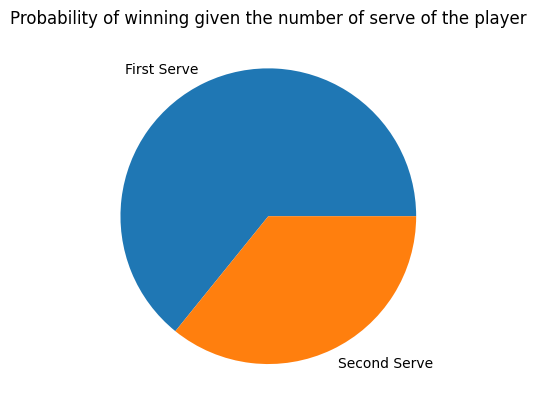

In [ ]:
for index, row in df.iterrows():
  if row["FSP.1"]=="NA" or row["FSP.2"]=="NA":
    df.drop(index)
  else:
    row["FSP.1"]=int(row["FSP.1"])
    row["FSP.2"]=int(row["FSP.2"])
FSP1=df["FSP.1"]
FSP2=df["FSP.2"]
winning=df["Result"]

fs=FSP1/FSP2

import matplotlib.pyplot as plt
plt.scatter(fs, winning)

import seaborn as sns
plt.figure()
j = sns.jointplot(x=fs, y=winning)
j.set_axis_labels('FSP for Player 1 / FSP for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, hue=winning)
j.set_axis_labels('FSP for Player 1 / FSP for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, hue=fs)
j.set_axis_labels('FSP for Player 1 / FSP for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, kind="reg")
j.set_axis_labels('FSP for Player 1 / FSP for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, kind="kde")
j.set_axis_labels('FSP for Player 1 / FSP for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()

fswin1=0
sswin2=0
for i in range(len(fs)):
  if fs[i]>=1 and winning[i]==1:
    fswin1+=1
  elif fs[i]<1 and winning[i]==1:
    sswin2+=1


print("probability of winning given there is a first serve:", fswin1/(fswin1+sswin2))
print("probability of winning given there is a second serve:", sswin2/(fswin1+sswin2))
plt.figure()
plt.pie([fswin1/(fswin1+sswin2),sswin2/(fswin1+sswin2)], labels=["First Serve","Second Serve"])
plt.title("Probability of winning given the number of serve of the player")


dic={}
for index, row in df.iterrows():
  if row["Player1"] in dic.keys():
    dic[row["Player1"]]+=row["FSP.1"]
  else:
    dic.update({row["Player1"]:row["FSP.1"]})
  if row["Player2"] in dic.keys():
    dic[row["Player2"]]+=row["FSP.2"]
  else:
    dic.update({row["Player2"]:row["FSP.2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1], reverse=True)
print("CORR:",df['Result'].corr(df["FSP.1"]))
print(a[:10])

import numpy as np
m1=np.mean(FSP1)
m2=np.mean(FSP2)
sd1=np.var(FSP1)
sd2=np.var(FSP1)
print("MEANS:",m1,m2,"VAR:",sd1,sd2)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/AusOpen-women-2013.csv')
dic={}
for index, row in df.iterrows():
  if row["Player1"] in dic.keys():
    dic[row["Player1"]]+=row["FNL1"]
  else:
    dic.update({row["Player1"]:row["FNL1"]})
  if row["Player2"] in dic.keys():
    dic[row["Player2"]]+=row["FNL2"]
  else:
    dic.update({row["Player2"]:row["FNL2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1], reverse=True)

print(a[:10])

[('Na Li', 14.0), ('Dominika Cibulkova', 12.0), ('Eugenie Bouchard', 10.0), ('Agnieszka Radwanska', 10.0), ('Ana Ivanovic', 9.0), ('Simona Halep', 8.0), ('Jelena Jankovic', 7.0), ('Kurumi Nara', 4.0), ('Zarina Diyas', 4.0), ('Carla Suarez Navarro', 4.0)]


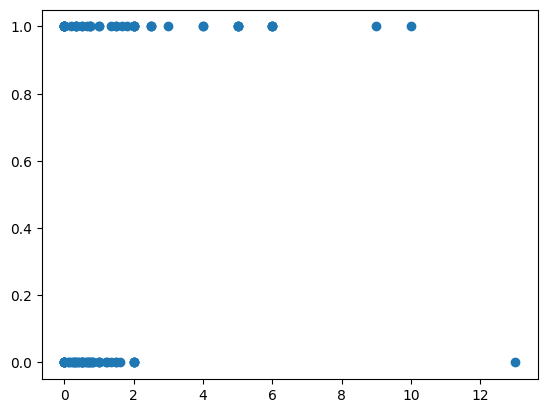

<Figure size 640x480 with 0 Axes>

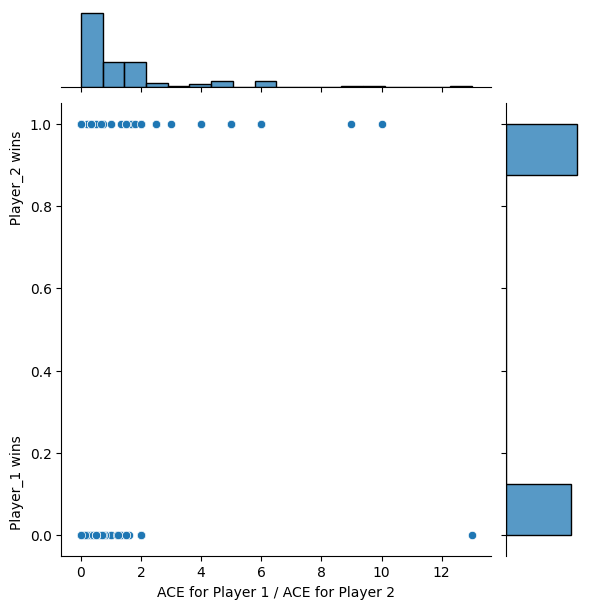

<Figure size 640x480 with 0 Axes>

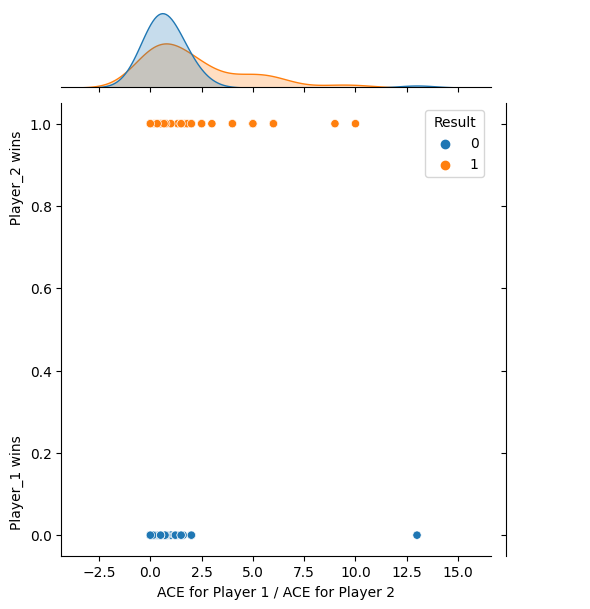

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide



<Figure size 640x480 with 0 Axes>

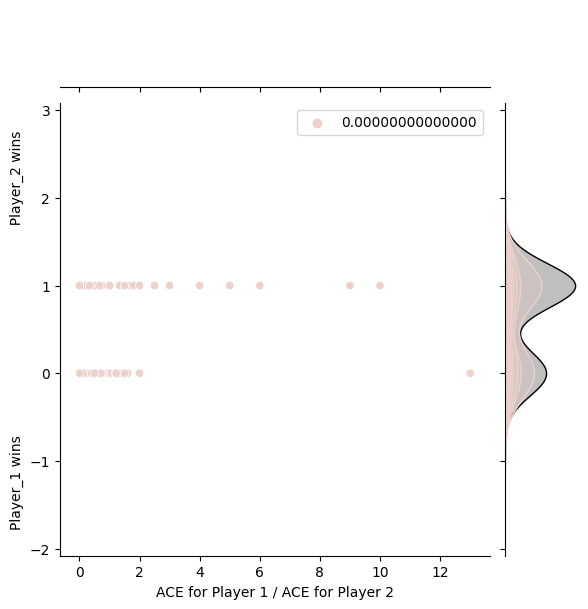

/usr/local/lib/python3.9/dist-packages/numpy/core/function_base.py:151: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning:

All-NaN slice encountered



<Figure size 640x480 with 0 Axes>

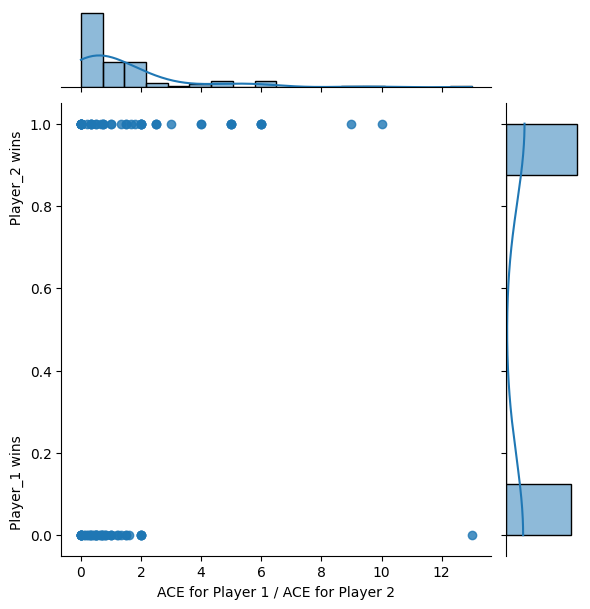

<Figure size 640x480 with 0 Axes>

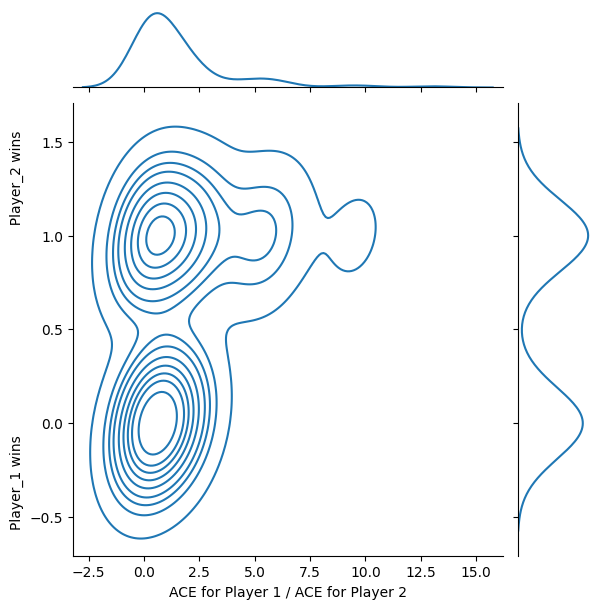

probability of winning given there is a more ace: 0.6818181818181818
probability of winning given there is a less ace: 0.3181818181818182
CORR: 0.09073954090058929
[('Serena Williams', 39.0), ('Eugenie Bouchard', 19.0), ('Daniela Hantuchova', 17.0), ('Karolina Pliskova', 16.0), ('Madison Keys', 14.0), ('Samantha Stosur', 13.0), ('Ana Ivanovic', 13.0), ('Vesna Dolonc', 9.0), ('Virginie Razzano', 9.0), ('Heather Watson', 8.0)]
MEANS: 2.9016393442622954 VAR: 7.7368986831496915


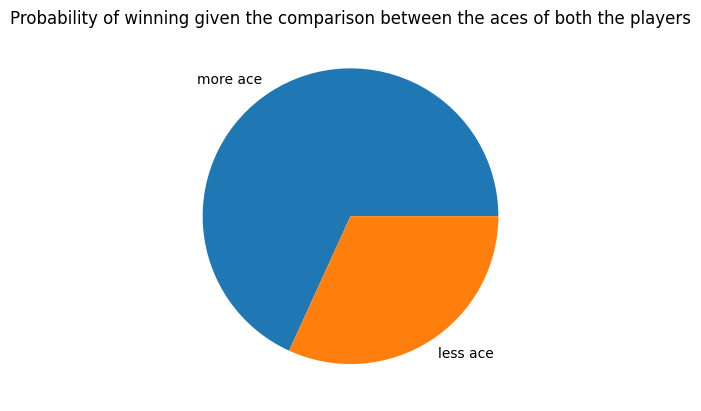

In [ ]:
for index, row in df.iterrows():
  if type(row["ACE.1"])==float or type(row["ACE.2"])==float:
    df.drop(index)
  else:
    row["ACE.1"]=int(row["ACE.1"])
    row["ACE.2"]=int(row["ACE.2"])
FSP1=df["ACE.1"]
FSP2=df["ACE.2"]
winning=df["Result"]

fs=FSP1/FSP2

import matplotlib.pyplot as plt
plt.scatter(fs, winning)

import seaborn as sns
plt.figure()
j = sns.jointplot(x=fs, y=winning)
j.set_axis_labels('ACE for Player 1 / ACE for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, hue=winning)
j.set_axis_labels('ACE for Player 1 / ACE for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, hue=fs)
j.set_axis_labels('ACE for Player 1 / ACE for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, kind="reg")
j.set_axis_labels('ACE for Player 1 / ACE for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, kind="kde")
j.set_axis_labels('ACE for Player 1 / ACE for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()


fswin1=0
sswin2=0
for i in range(len(fs)):
  if fs[i]>=1 and winning[i]==1:
    fswin1+=1
  elif fs[i]<1 and winning[i]==1:
    sswin2+=1


print("probability of winning given there is a more ace:", fswin1/(fswin1+sswin2))
print("probability of winning given there is a less ace:", sswin2/(fswin1+sswin2))
plt.figure()
plt.pie([fswin1/(fswin1+sswin2),sswin2/(fswin1+sswin2)], labels=["more ace","less ace"])
plt.title("Probability of winning given the comparison between the aces of both the players")


dic={}
for index, row in df.iterrows():
  if row["Player1"] in dic.keys():
    dic[row["Player1"]]+=row["ACE.1"]
  else:
    dic.update({row["Player1"]:row["ACE.1"]})
  if row["Player2"] in dic.keys():
    dic[row["Player2"]]+=row["ACE.2"]
  else:
    dic.update({row["Player2"]:row["ACE.2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1], reverse=True)
print("CORR:",df['Result'].corr(df["ACE.1"]))
print(a[:10])

import numpy as np
m1=np.mean(FSP1)
m2=np.mean(FSP2)
sd1=np.var(FSP1)
sd2=np.var(FSP1)
print("MEANS:",(m1+m2)/2,"VAR:",(sd1+sd2)/2)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/FrenchOpen-men-2013.csv')
dic={}
for index, row in df.iterrows():
  if row["Player1"] in dic.keys():
    dic[row["Player1"]]+=row["FNL.1"]
  else:
    dic.update({row["Player1"]:row["FNL.1"]})
  if row["Player2"] in dic.keys():
    dic[row["Player2"]]+=row["FNL.2"]
  else:
    dic.update({row["Player2"]:row["FNL.2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1], reverse=True)

print(a[:10])

[('Rafael Nadal', 21), ('David Ferrer', 18), ('Novak Djokovic', 17), ('Jo-Wilfried Tsonga', 15), ('Roger Federer', 12), ('Tommy Robredo', 12), ('Stanislas Wawrinka', 12), ('Gilles Simon', 11), ('Nicolas Almagro', 11), ('Richard Gasquet', 11)]


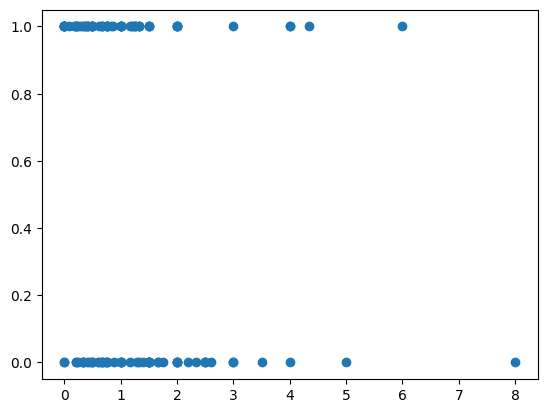

<Figure size 640x480 with 0 Axes>

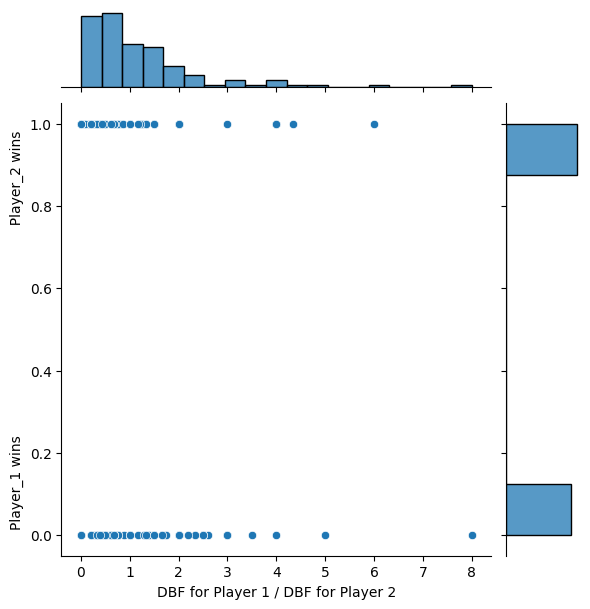

<Figure size 640x480 with 0 Axes>

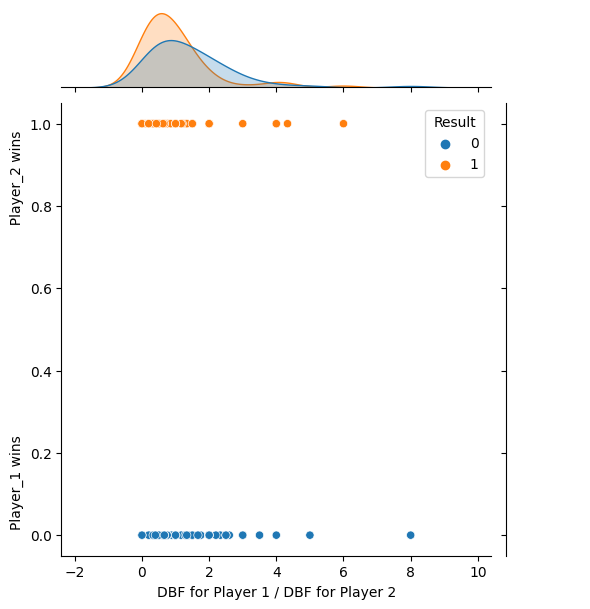

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide



<Figure size 640x480 with 0 Axes>

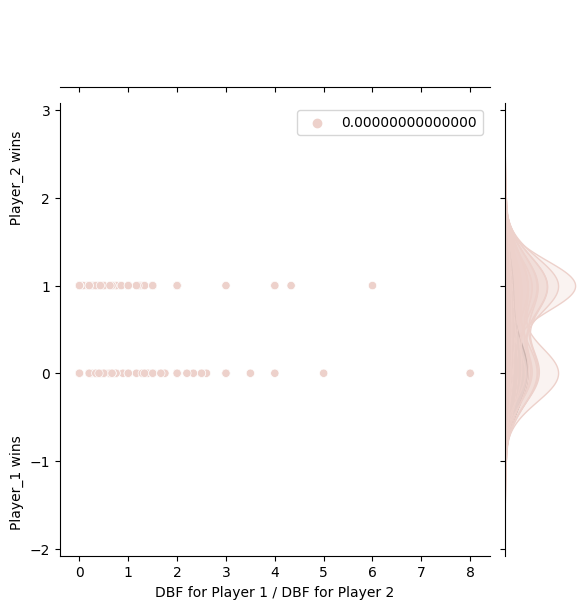

/usr/local/lib/python3.9/dist-packages/numpy/core/function_base.py:151: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning:

invalid value encountered in subtract



<Figure size 640x480 with 0 Axes>

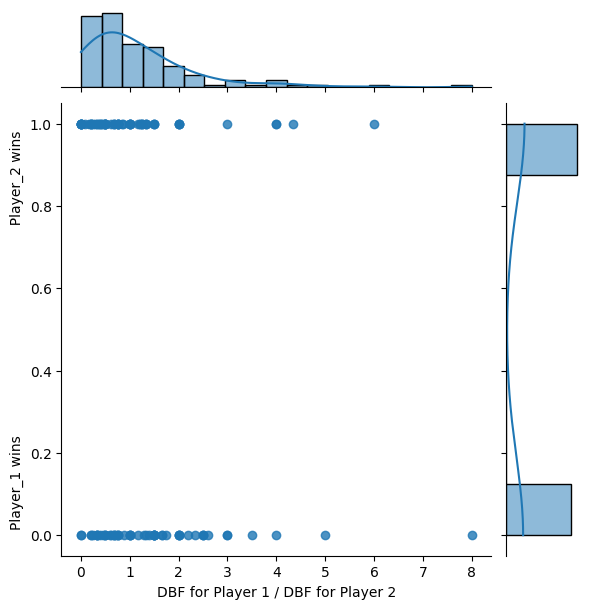

<Figure size 640x480 with 0 Axes>

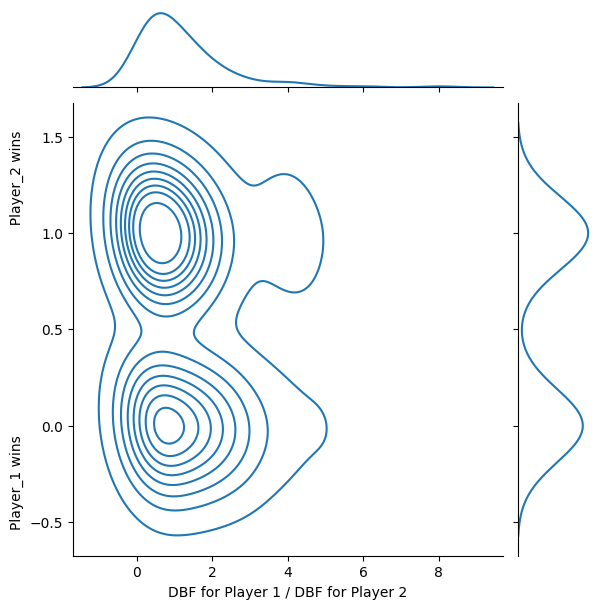

probability of winning given there is a more Double Faults committed: 0.4090909090909091
probability of winning given there is a less Double Faults committed: 0.5909090909090909
CORR: -0.14630339119189076
[('Dominika Cibulkova', 26.0), ('Victoria Azarenka', 22.0), ('Galina Voskoboeva', 16.0), ('Jelena Jankovic', 15.0), ('Simona Halep', 13.0), ('Kurumi Nara', 10.0), ('Marina Erakovic', 10.0), ('Varvara Lepchenko', 9.0), ('Zarina Diyas', 8.0), ('Alize Cornet', nan)]
MEANS: 3.9642857142857144 VAR: 7.458049886621315


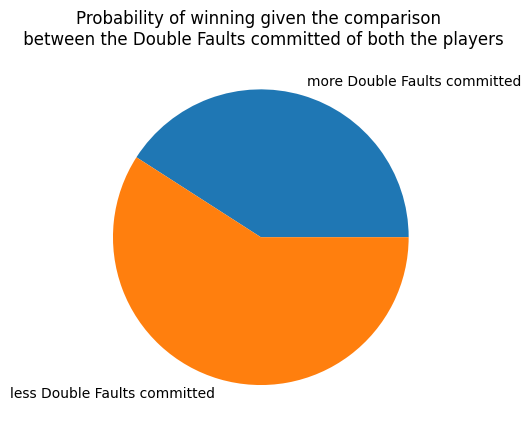

In [ ]:
for index, row in df.iterrows():
  if type(row["DBF.1"])!=int:
    df.drop(index)
  else:
    row["DBF.1"]=int(row["DBF.1"])
  if type(row["DBF.2"])!=int:
     df.drop(index)
  else:
    row["DBF.2"]=int(row["DBF.2"])
FSP1=df["DBF.1"]
FSP2=df["DBF.2"]
winning=df["Result"]

fs=FSP1/FSP2

import matplotlib.pyplot as plt
plt.scatter(fs, winning)

import seaborn as sns
plt.figure()
j = sns.jointplot(x=fs, y=winning)
j.set_axis_labels('DBF for Player 1 / DBF for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, hue=winning)
j.set_axis_labels('DBF for Player 1 / DBF for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, hue=fs)
j.set_axis_labels('DBF for Player 1 / DBF for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, kind="reg")
j.set_axis_labels('DBF for Player 1 / DBF for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, kind="kde")
j.set_axis_labels('DBF for Player 1 / DBF for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()


fswin1=0
sswin2=0
for i in range(len(fs)):
  if fs[i]>=1 and winning[i]==1:
    fswin1+=1
  elif fs[i]<1 and winning[i]==1:
    sswin2+=1


print("probability of winning given there is a more Double Faults committed:", fswin1/(fswin1+sswin2))
print("probability of winning given there is a less Double Faults committed:", sswin2/(fswin1+sswin2))
plt.figure()
plt.pie([fswin1/(fswin1+sswin2),sswin2/(fswin1+sswin2)], labels=["more Double Faults committed","less Double Faults committed"])
plt.title("Probability of winning given the comparison \n between the Double Faults committed of both the players")


dic={}
for index, row in df.iterrows():
  if row["Player1"] in dic.keys():
    dic[row["Player1"]]+=row["DBF.1"]
  else:
    dic.update({row["Player1"]:row["DBF.1"]})
  if row["Player2"] in dic.keys():
    dic[row["Player2"]]+=row["DBF.2"]
  else:
    dic.update({row["Player2"]:row["DBF.2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1], reverse=True)
print("CORR:",df['Result'].corr(df["DBF.1"]))
print(a[:10])

import numpy as np
m1=np.mean(FSP1)
m2=np.mean(FSP2)
sd1=np.var(FSP1)
sd2=np.var(FSP1)
print("MEANS:",(m1+m2)/2,"VAR:",(sd1+sd2)/2)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/FrenchOpen-women-2013.csv')
dic={}
for index, row in df.iterrows():
  if row["Player1"] in dic.keys():
    dic[row["Player1"]]+=row["FNL.1"]
  else:
    dic.update({row["Player1"]:row["FNL.1"]})
  if row["Player2"] in dic.keys():
    dic[row["Player2"]]+=row["FNL.2"]
  else:
    dic.update({row["Player2"]:row["FNL.2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1], reverse=True)

print(a[:10])

[('Serena Williams', 14), ('Maria Sharapova', 12), ('Victoria Azarenka', 11), ('Sara Errani', 10), ('Jelena Jankovic', 9), ('Svetlana Kuznetsova', 9), ('Agnieszka Radwanska', 8), ('Maria Kirilenko', 7), ('Carla Suarez Navarro', 7), ('Angelique Kerber', 7)]


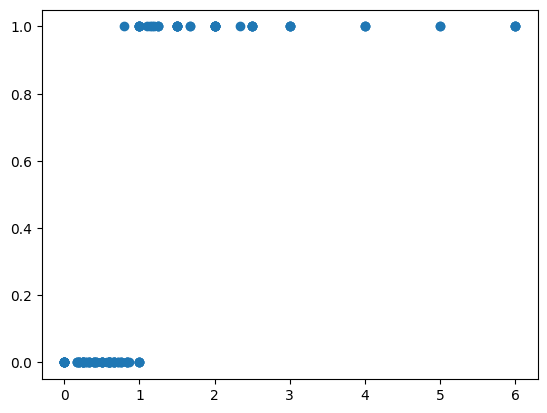

<Figure size 640x480 with 0 Axes>

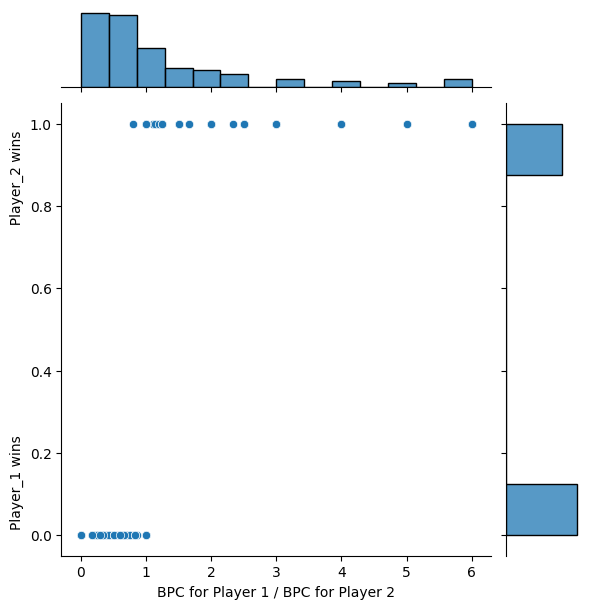

<Figure size 640x480 with 0 Axes>

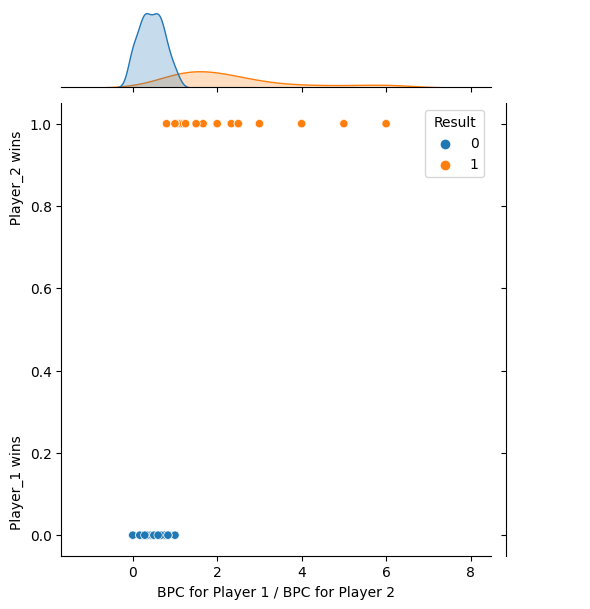

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:1355: RuntimeWarning:

invalid value encountered in true_divide



<Figure size 640x480 with 0 Axes>

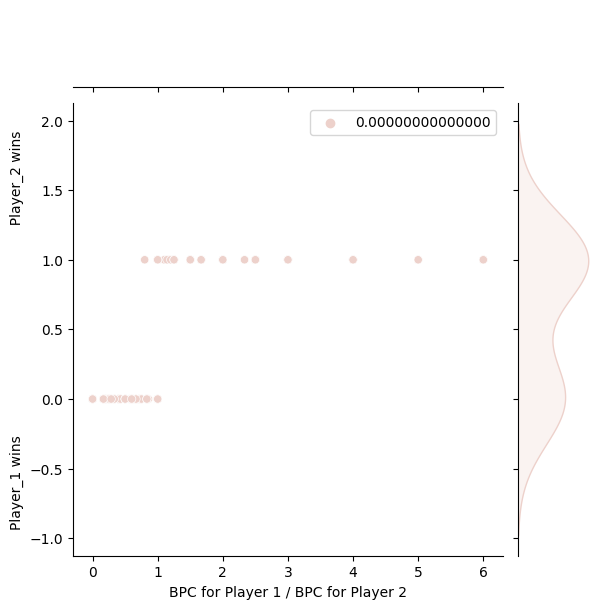

/usr/local/lib/python3.9/dist-packages/numpy/core/function_base.py:151: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning:

invalid value encountered in subtract



<Figure size 640x480 with 0 Axes>

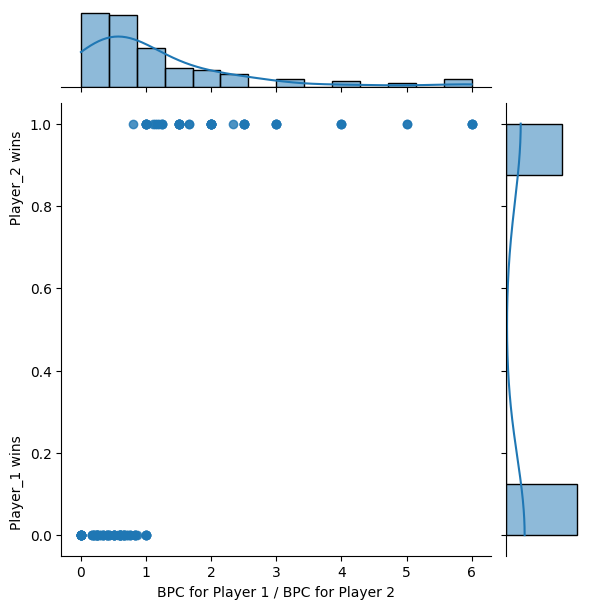

<Figure size 640x480 with 0 Axes>

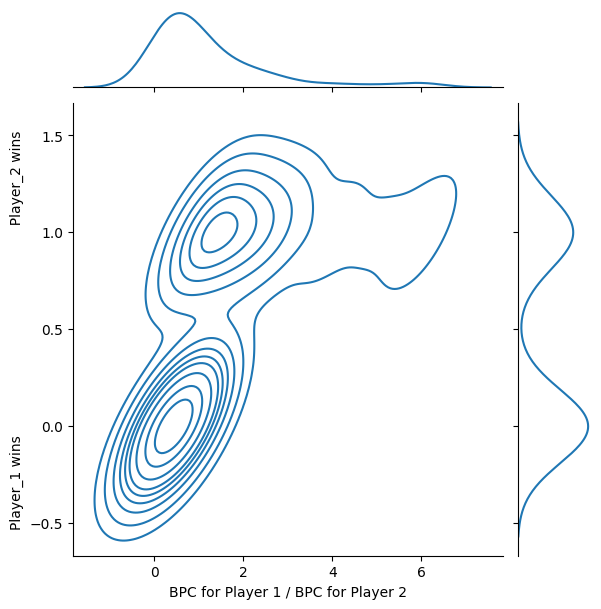

probability of winning given there is a more Break Points Created: 0.9821428571428571
probability of winning given there is a less Break Points Created: 0.017857142857142856
CORR: 0.6465944606739645
[('Victoria Azarenka', 36), ('Serena Williams', 33), ('Maria Sharapova', 32), ('Sara Errani', 31), ('Jelena Jankovic', 24), ('Agnieszka Radwanska', 24), ('Svetlana Kuznetsova', 24), ('Carla Suarez Navarro', 23), ('Francesca Schiavone', 21), ('Bethanie Mattek-Sands', 20)]
CORR: nan
CORR: nan
[('Karin Knapp', 1.0), ('Julia Glushko', 1.0), ('Pauline Parmentier', 1.0), ('Monica Niculescu', 1.0), ('Grace Min', 1.4285714285714286), ('Tatjana Maria', 1.5), ('Arantxa Rus', 1.5), ('Venus Williams', 1.5), ('Nadia Petrova', 1.6), ('Lucie Hradecka', 1.6666666666666667)]


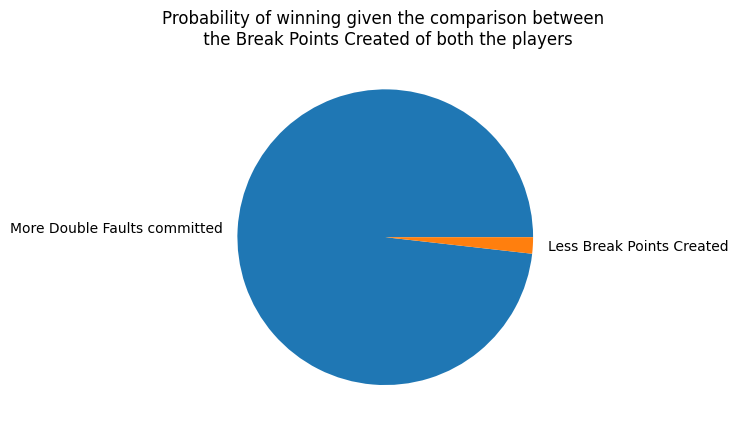

In [ ]:
import pandas as pd
df=pd.read_csv('/content/FrenchOpen-women-2013.csv')
for index, row in df.iterrows():
  if type(row["BPC.1"])!=int:
    df.drop(index)
  else:
    row["BPC.1"]=int(row["BPC.1"])
  if type(row["BPC.2"])!=int:
     df.drop(index)
  else:
    row["BPC.2"]=int(row["BPC.2"])
FSP1=df["BPC.1"]
FSP2=df["BPC.2"]
winning=df["Result"]

fs=FSP1/FSP2

import matplotlib.pyplot as plt
plt.scatter(fs, winning)

import seaborn as sns
plt.figure()
j = sns.jointplot(x=fs, y=winning)
j.set_axis_labels('BPC for Player 1 / BPC for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, hue=winning)
j.set_axis_labels('BPC for Player 1 / BPC for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, hue=fs)
j.set_axis_labels('BPC for Player 1 / BPC for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, kind="reg")
j.set_axis_labels('BPC for Player 1 / BPC for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, kind="kde")
j.set_axis_labels('BPC for Player 1 / BPC for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()


fswin1=0
sswin2=0
for i in range(len(fs)):
  if fs[i]>=1 and winning[i]==1:
    fswin1+=1
  elif fs[i]<1 and winning[i]==1:
    sswin2+=1


print("probability of winning given there is a more Break Points Created:", fswin1/(fswin1+sswin2))
print("probability of winning given there is a less Break Points Created:", sswin2/(fswin1+sswin2))
plt.figure()
plt.pie([fswin1/(fswin1+sswin2),sswin2/(fswin1+sswin2)], labels=["More Double Faults committed","Less Break Points Created"])
plt.title("Probability of winning given the comparison between \n the Break Points Created of both the players")


dic={}
for index, row in df.iterrows():
  if row["Player1"] in dic.keys():
    dic[row["Player1"]]+=row["BPC.1"]
  else:
    dic.update({row["Player1"]:row["BPC.1"]})
  if row["Player2"] in dic.keys():
    dic[row["Player2"]]+=row["BPC.2"]
  else:
    dic.update({row["Player2"]:row["BPC.2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1], reverse=True)
print("CORR:",df['Result'].corr(df["BPC.1"]))
print(a[:10])



for index, row in df.iterrows():
  if row["BPC.1"]==0:
    df.drop(index)
  if row["BPC.2"]==0:
     df.drop(index)


dic={}
for index, row in df.iterrows():
  if row["Player1"] in dic.keys():
    if int(row["BPC.1"])!=0:
      dic[row["Player1"]]+=row["BPW.1"]/row["BPC.1"]
  else:
    if int(row["BPC.1"])!=0:
      dic.update({row["Player1"]:(row["BPW.1"])/int(row["BPC.1"])})
  if row["Player2"] in dic.keys():
    if int(row["BPC.2"])!=0:
      dic[row["Player2"]]+=row["BPW.2"]/row["BPC.2"]
  else:
    if int(row["BPC.2"])!=0:
      dic.update({row["Player2"]:row["BPW.2"]/row["BPC.2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1])
print("CORR:",df['Result'].corr(df["BPW.1"]/df["BPC.1"]))
print("CORR:",df['Result'].corr(df["BPW.2"]/df["BPC.2"]))
print(a[:10])


[('Rafael Nadal', 21), ('Stanislas Wawrinka', 17), ('Novak Djokovic', 16), ('Richard Gasquet', 15), ('David Ferrer', 14), ('Mikhail Youzhny', 13), ('Tommy Robredo', 12), ('Andy Murray', 12), ('Milos Raonic', 11), ('Lleyton Hewitt', 11)]


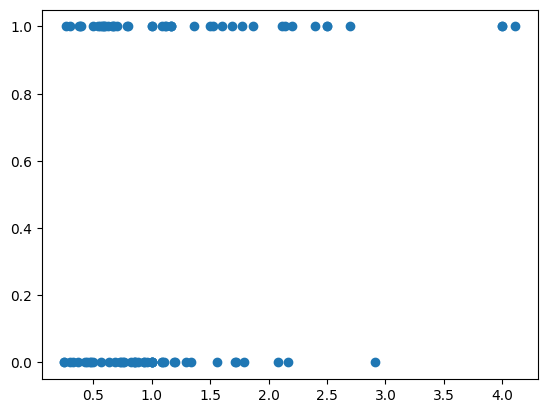

<Figure size 640x480 with 0 Axes>

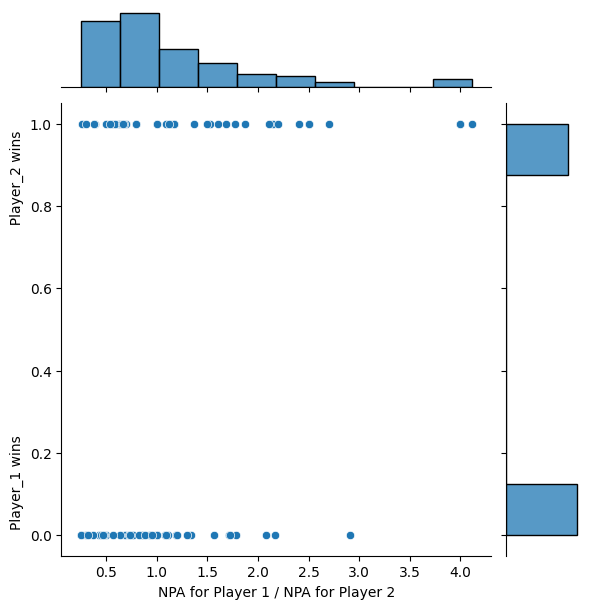

<Figure size 640x480 with 0 Axes>

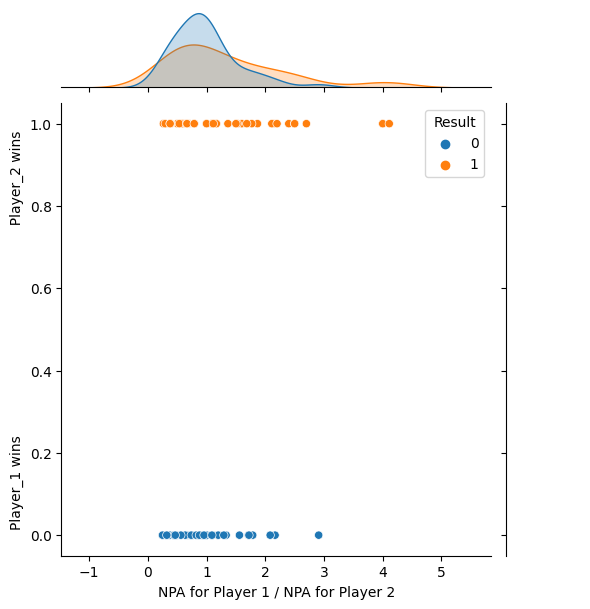

<Figure size 640x480 with 0 Axes>

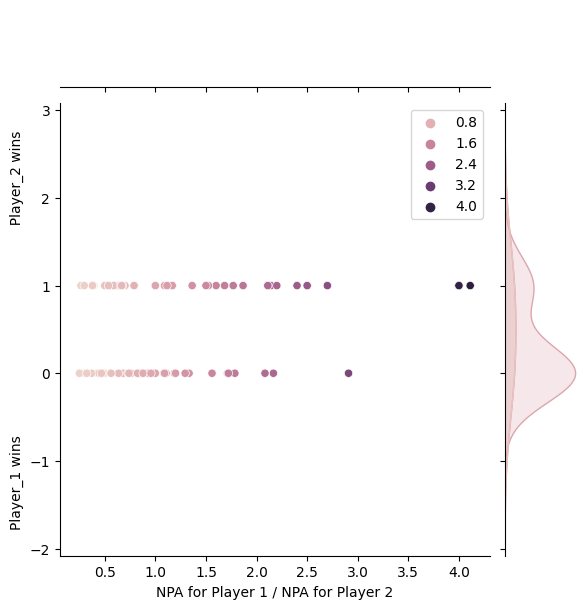

<Figure size 640x480 with 0 Axes>

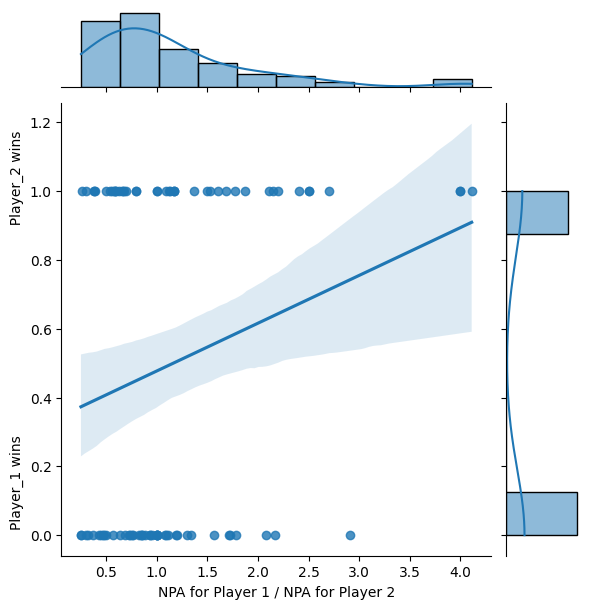

<Figure size 640x480 with 0 Axes>

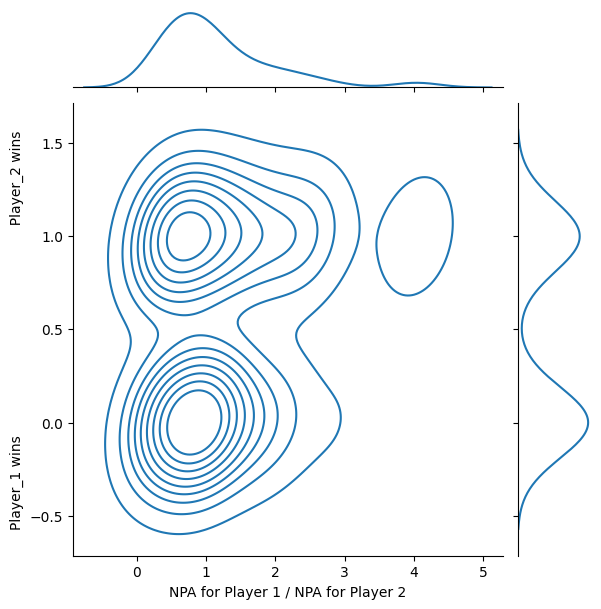

probability of winning given there is a more ratio of Net Points Won / Net Points Attempted: 0.5681818181818182
probability of winning given there is a less ratio of Net Points Won / Net Points Attempted: 0.4318181818181818
CORR: -0.2886009804726583
CORR: 0.545943294638453
[('Michael Russell', 1.3333333333333333), ('Richard Gasquet', 9.195148489503328), ('Stephane Robert', nan), ('Albano Olivetti', nan), ('Jan-Lennard Struff', nan), ('Guillaume Rufin', nan), ('Aljaz Bedene', nan), ('Dmitry Tursunov', nan), ('Feliciano Lopez', nan), ('Florent Serra', nan)]
MEANS: 19.0625 VAR: 72.24883780991738


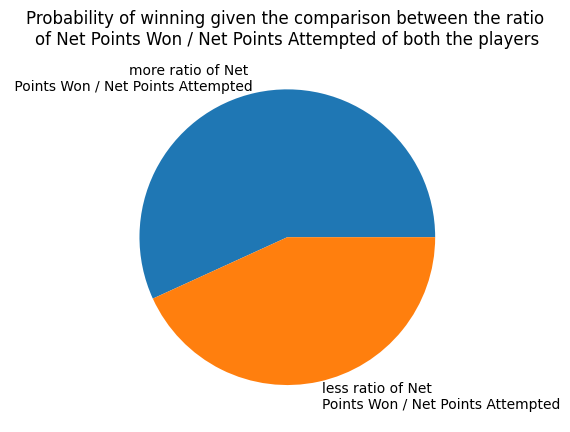

In [ ]:
import pandas as pd
df=pd.read_csv('/content/USOpen-men-2013.csv')
dic={}
for index, row in df.iterrows():
  if row["Player1"] in dic.keys():
    dic[row["Player1"]]+=row["FNL1"]
  else:
    dic.update({row["Player1"]:row["FNL1"]})
  if row["Player2"] in dic.keys():
    dic[row["Player2"]]+=row["FNL2"]
  else:
    dic.update({row["Player2"]:row["FNL2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1], reverse=True)

print(a[:10])
for index, row in df.iterrows():
  if type(row["NPA.1"])!=int:
    df.drop(index)
  else:
    row["NPA.1"]=int(row["NPA.1"])
  if type(row["NPA.2"])!=int:
     df.drop(index)
  else:
    row["NPA.2"]=int(row["NPA.2"])
FSP1=df["NPA.1"]
FSP2=df["NPA.2"]
winning=df["Result"]

fs=FSP1/FSP2

import matplotlib.pyplot as plt
plt.scatter(fs, winning)

import seaborn as sns
plt.figure()
j = sns.jointplot(x=fs, y=winning)
j.set_axis_labels('NPA for Player 1 / NPA for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, hue=winning)
j.set_axis_labels('NPA for Player 1 / NPA for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, hue=fs)
j.set_axis_labels('NPA for Player 1 / NPA for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, kind="reg")
j.set_axis_labels('NPA for Player 1 / NPA for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()
plt.figure()
j=sns.jointplot(x=fs, y=winning, kind="kde")
j.set_axis_labels('NPA for Player 1 / NPA for Player 2', 'Player_1 wins                                                Player_2 wins')
plt.show()


fswin1=0
sswin2=0
for i in range(len(fs)):
  if fs[i]>=1 and winning[i]==1:
    fswin1+=1
  elif fs[i]<1 and winning[i]==1:
    sswin2+=1


print("probability of winning given there is a more ratio of Net Points Won / Net Points Attempted:", fswin1/(fswin1+sswin2))
print("probability of winning given there is a less ratio of Net Points Won / Net Points Attempted:", sswin2/(fswin1+sswin2))
plt.figure()
plt.pie([fswin1/(fswin1+sswin2),sswin2/(fswin1+sswin2)], labels=["more ratio of Net \n Points Won / Net Points Attempted","less ratio of Net \nPoints Won / Net Points Attempted"])
plt.title("Probability of winning given the comparison between the ratio \nof Net Points Won / Net Points Attempted of both the players")


dic={}
for index, row in df.iterrows():
  if row["Player1"] in dic.keys():
    dic[row["Player1"]]+=row["NPW.1"]/row["NPA.1"]
  else:
    dic.update({row["Player1"]:row["NPW.1"]/row["NPA.1"]})
  if row["Player2"] in dic.keys():
    dic[row["Player2"]]+=row["NPW.2"]/row["NPA.2"]
  else:
    dic.update({row["Player2"]:row["NPW.2"]/row["NPA.2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1])
print("CORR:",df['Result'].corr(df["NPW.1"]/df["NPA.1"]))
print("CORR:",df['Result'].corr(df["NPW.2"]/df["NPA.2"]))
print(a[:10])

import numpy as np
m1=np.mean(FSP1)
m2=np.mean(FSP2)
sd1=np.var(FSP1)
sd2=np.var(FSP1)
print("MEANS:",(m1+m2)/2,"VAR:",(sd1+sd2)/2)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/USOpen-women-2013.csv')
dic={}
for index, row in df.iterrows():
  if row["Player 1"] in dic.keys():
    dic[row["Player 1"]]+=row["FNL.1"]
  else:
    dic.update({row["Player 1"]:row["FNL.1"]})
  if row["Player 2"] in dic.keys():
    dic[row["Player 2"]]+=row["FNL.2"]
  else:
    dic.update({row["Player 2"]:row["FNL.2"]})

a=list(dic.items())
a.sort(key=lambda x:x[1], reverse=True)

print(a[:10])

set1res1=df["ST1.1"]
set1res2=df["ST2.1"]
set2res1=df["ST2.1"]
set2res2=df["ST2.2"]
set3res1=df["ST3.1"]
set3res2=df["ST3.2"]
player1=df["Player 1"]
player2=df["Player 2"]

set1won=0
set12won1=0
set1lost=0
set1won2lost1=0
set2won=0
set2lost=0
set3won=0
set3lost=0
set1lost1set2won1=0
set1lost1set2lost1=0

res_set1=0
for i in range(len(set1res1)):
  if set1res1[i]>set1res2[i]:
    set1won+=1
  else:
    set1lost+=1
  if set2res1[i]>set2res2[i]:
    set2won+=1
  else:
    set2lost+=1
  if set3res1[i]>set3res2[i]:
    set3won+=1
  else:
    set3lost+=1

  if set2res1[i]>set2res2[i] and set1res1[i]>set1res2[i]:
    set12won1+=1
  elif set2res1[i]<set2res2[i] and set1res1[i]>set1res2[i]:
    set1won2lost1+=1
  elif set2res1[i]>set2res2[i] and set1res1[i]<set1res2[i]:
    set1lost1set2won1+=1
  else:
    set1lost1set2lost1+=1


prob1=set1won/(set1won+set1lost)
prob2=set2won/(set2won+set2lost)

print("Prob of player 1 to win game 1:",prob1)
print("Prob of player 1 to win game 2:",prob2)

print("Prob of player 1 to win game 2 given that game 1 won:",set12won1/set1won )
print("Prob of player 1 to lose game 2 given that game 1 won:",set1won2lost1/set1won )
print("Prob of player 1 to win game 2 given that game 1 was lost:",set1lost1set2won1/set1lost)
print("Prob of player 1 to lose game 2 given that game 1 was lost:",set1lost1set2lost1/set1lost)









tset1won=0
tset12won1=0
tset1lost=0
tset1won2lost1=0
tset2won=0
tset2lost=0
tset3won=0
tset3lost=0
tset1lost1set2won1=0
tset1lost1set2lost1=0

print("\n\n\n")
res_set1=0
for i in range(len(set1res1)):
  if set1res1[i]<set1res2[i]:
    tset1won+=1
  else:
    tset1lost+=1
  if set2res1[i]<set2res2[i]:
    tset2won+=1
  else:
    tset2lost+=1
  if set3res1[i]<set3res2[i]:
    tset3won+=1
  else:
    tset3lost+=1

  if set2res1[i]<set2res2[i] and set1res1[i]<set1res2[i]:
    tset12won1+=1
  elif set2res1[i]>set2res2[i] and set1res1[i]<set1res2[i]:
    tset1won2lost1+=1
  elif set2res1[i]<set2res2[i] and set1res1[i]>set1res2[i]:
    tset1lost1set2won1+=1
  else:
    tset1lost1set2lost1+=1
print("Prob of player 2 to win game 1:",prob1)
print("Prob of player 2 to win game 2:",prob2)

print("Prob of player 2 to win game 2 given that game 1 won:",tset12won1/tset1won )
print("Prob of player 2 to lose game 2 given that game 1 won:",tset1won2lost1/tset1won)
print("Prob of player 2 to win game 2 given that game 1 was lost:",tset1lost1set2won1/tset1lost)
print("Prob of player 2 to lose game 2 given that game 1 was lost:",tset1lost1set2lost1/tset1lost)

[('V Azarenka', 13), ('S Williams', 12), ('N Li', 10), ('F Pennetta', 8), ('C Suarez Navarro', 8), ('A Ivanovic', 7), ('A Kerber', 7), ('D Hantuchova', 6), ('S Stephens', 6), ('A Riske', 5)]
Prob of player 1 to win game 1: 0.35526315789473684
Prob of player 1 to win game 2: 0.4605263157894737
Prob of player 1 to win game 2 given that game 1 won: 0.1111111111111111
Prob of player 1 to lose game 2 given that game 1 won: 0.8888888888888888
Prob of player 1 to win game 2 given that game 1 was lost: 0.2857142857142857
Prob of player 1 to lose game 2 given that game 1 was lost: 0.7142857142857143




Prob of player 2 to win game 1: 0.35526315789473684
Prob of player 2 to win game 2: 0.4605263157894737
Prob of player 2 to win game 2 given that game 1 won: 0.4166666666666667
Prob of player 2 to lose game 2 given that game 1 won: 0.5833333333333334
Prob of player 2 to win game 2 given that game 1 was lost: 0.46153846153846156
Prob of player 2 to lose game 2 given that game 1 was lost: 0.5384615

In [ ]:
import numpy as np
prob_win1_win2=np.mean([set12won1/set1won, tset12won1/tset1won])
prob_win1_lose2=np.mean([set1won2lost1/set1won, tset1won2lost1/tset1won])
prob_lose1_win2=np.mean([set1lost1set2won1/set1lost, tset1lost1set2won1/tset1lost])
prob_lose1_lose2=np.mean([set1lost1set2lost1/set1lost, tset1lost1set2lost1/tset1lost])

print(prob_win1_win2)

import pandas as pd
idx = ["WON", "LOST"]
cols = ["WON", "LOST"]
dfprob = pd.DataFrame([[prob_win1_win2,prob_win1_lose2],[prob_lose1_win2,prob_lose1_lose2]],columns = cols, index = idx)

dfprob

0.2638888888888889


,WON,LOST
WON,0.263889,0.736111
LOST,0.373626,0.626374


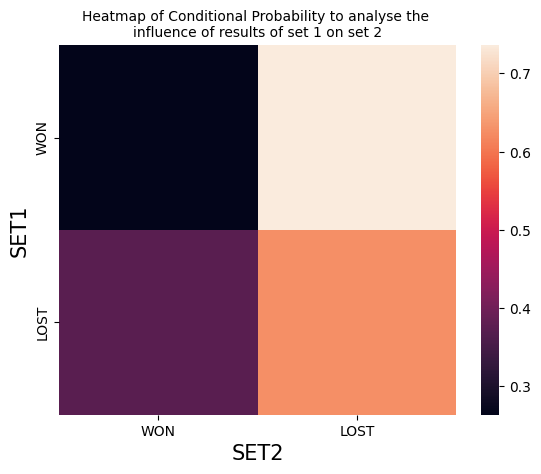

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.heatmap(dfprob)
plt.title('Heatmap of Conditional Probability to analyse the \ninfluence of results of set 1 on set 2', fontsize = 10)
plt.xlabel('SET2', fontsize = 15)
plt.ylabel('SET1', fontsize = 15)
plt.show()

longest game

max number of sets per game

player with most games

player with the largest num of goodies

which parameter is the strongest? dimensional reduction of goodies and predict. match??

player vs total points
total games won

In [ ]:
dic={}
import numpy as np
import pandas as pd
df=pd.read_csv('/Wimbledon-men-2013.csv')
  
lis_players=list(df["Player1"])+list(df["Player2"])
unique, counts=np.unique(lis_players, return_counts=True)
unique_with_counts=list(zip(counts,unique))
unique_with_counts.sort(key=lambda x: x[0], reverse=True)
unique_with_counts

[(7, 'A.Murray'),
 (7, 'N.Djokovic'),
 (6, 'J.Del Potro'),
 (5, 'J.Janowicz'),
 (5, 'T.Berdych'),
 (4, 'B.Tomic'),
 (4, 'D.Ferrer'),
 (4, 'F.Verdasco'),
 (4, 'I.Dodig'),
 (4, 'J.Melzer'),
 (3, 'A.Kuznetsov'),
 (3, 'A.Mannarino'),
 (3, 'A.Seppi'),
 (3, 'D.Brown'),
 (3, 'G.Zemlja'),
 (3, 'I.Sijsling'),
 (3, 'J.Chardy'),
 (3, 'K.Anderson'),
 (3, 'K.Nishikori'),
 (3, 'L.Kubot'),
 (3, 'M.Youzhny'),
 (3, 'N.Almagro'),
 (3, 'R.Gasquet'),
 (3, 'S.Stakhovsky'),
 (3, 'T.Haas'),
 (3, 'T.Robredo'),
 (2, 'A.Dolgopolov'),
 (2, 'B.Paire'),
 (2, 'B.Reynolds'),
 (2, 'D.Brands'),
 (2, 'D.Kudla'),
 (2, 'E.Gulbis'),
 (2, 'F.Lopez'),
 (2, 'G.Dimitrov'),
 (2, 'G.Rufin'),
 (2, 'G.Soeda'),
 (2, 'J-W.Tsonga'),
 (2, 'J.Benneteau'),
 (2, 'J.Blake'),
 (2, 'J.Levine'),
 (2, 'J.Monaco'),
 (2, 'J.Reister'),
 (2, 'J.Struff'),
 (2, 'K.De Schepper'),
 (2, 'L.Hewitt'),
 (2, 'L.Mayer'),
 (2, 'M.Przysiezny'),
 (2, 'M.Raonic'),
 (2, 'N.Mahut'),
 (2, 'R.Federer'),
 (2, 'R.Ram'),
 (2, 'S.Robert'),
 (2, 'V.Pospisil'),
 (2, 'V

In [ ]:
result_unique=np.unique(lis_players, return_counts=False)
li=[]

for itm in unique:
  dic.update({itm:0})
for index, row in df.iterrows():
  if row["Result"]==1:
    li.append(row["Player1"])
  else:
    li.append(row["Player2"])
unique, counts=np.unique(li, return_counts=True)
unique_with_counts=list(zip(counts,unique))
unique_with_counts.sort(key=lambda x: x[0], reverse=True)
unique_with_counts

[(7, 'A.Murray'),
 (6, 'N.Djokovic'),
 (5, 'J.Del Potro'),
 (4, 'J.Janowicz'),
 (4, 'T.Berdych'),
 (3, 'B.Tomic'),
 (3, 'D.Ferrer'),
 (3, 'F.Verdasco'),
 (3, 'I.Dodig'),
 (3, 'J.Melzer'),
 (2, 'A.Mannarino'),
 (2, 'A.Seppi'),
 (2, 'B.Paire'),
 (2, 'D.Brown'),
 (2, 'E.Gulbis'),
 (2, 'G.Zemlja'),
 (2, 'I.Sijsling'),
 (2, 'J.Monaco'),
 (2, 'J.Struff'),
 (2, 'K.Anderson'),
 (2, 'K.Nishikori'),
 (2, 'L.Kubot'),
 (2, 'M.Youzhny'),
 (2, 'N.Almagro'),
 (2, 'R.Gasquet'),
 (2, 'S.Stakhovsky'),
 (2, 'T.Haas'),
 (2, 'T.Robredo'),
 (2, 'V.Troicki'),
 (1, 'A.Dolgopolov'),
 (1, 'A.Kuznetsov'),
 (1, 'B.Reynolds'),
 (1, 'D.Brands'),
 (1, 'D.Kudla'),
 (1, 'F.Lopez'),
 (1, 'G.Dimitrov'),
 (1, 'G.Rufin'),
 (1, 'G.Soeda'),
 (1, 'J-W.Tsonga'),
 (1, 'J.Benneteau'),
 (1, 'J.Blake'),
 (1, 'J.Chardy'),
 (1, 'J.Isner'),
 (1, 'J.Levine'),
 (1, 'J.Reister'),
 (1, 'K.De Schepper'),
 (1, 'L.Hewitt'),
 (1, 'L.Mayer'),
 (1, 'M.Cilic'),
 (1, 'M.Llodra'),
 (1, 'M.Przysiezny'),
 (1, 'M.Raonic'),
 (1, 'N.Mahut'),
 (1, 'P-

In [ ]:
top10=set(['A.Murray','N.Djokovic','J.Del Potro','J.Janowicz','T.Berdych','B.Tomic','D.Ferrer','F.Verdasco','I.Dodig','J.Melzer'])
top10

{'A.Murray',
 'B.Tomic',
 'D.Ferrer',
 'F.Verdasco',
 'I.Dodig',
 'J.Del Potro',
 'J.Janowicz',
 'J.Melzer',
 'N.Djokovic',
 'T.Berdych'}

In [ ]:
li_ace=[]

for itm in unique:
  dic.update({itm:0})
for index, row in df.iterrows():
  for a_ in range((row["ACE.1"])):
    li_ace.append(row["Player1"])
  for b_ in range((row["ACE.2"])):
    li_ace.append(row["Player2"])
unique, counts=np.unique(li_ace, return_counts=True)
unique_with_counts_ace=list(zip(counts,unique))
unique_with_counts_ace.sort(key=lambda x: x[0], reverse=True)
print(unique_with_counts_ace)

set_ace=[]
for i in range(10):
  set_ace.append((unique_with_counts_ace[i][1]))
set_ace=set(set_ace)
set_ace

print(len(set_ace.intersection(top10)))

[(96, 'J.Janowicz'), (89, 'A.Murray'), (80, 'N.Djokovic'), (63, 'I.Dodig'), (62, 'K.Anderson'), (62, 'T.Berdych'), (58, 'J.Del Potro'), (55, 'F.Verdasco'), (53, 'B.Tomic'), (51, 'V.Pospisil'), (50, 'G.Zemlja'), (50, 'N.Almagro'), (46, 'L.Kubot'), (41, 'D.Brown'), (41, 'M.Raonic'), (40, 'J.Melzer'), (39, 'T.Haas'), (38, 'B.Paire'), (38, 'D.Brands'), (38, 'S.Stakhovsky'), (36, 'G.Dimitrov'), (36, 'S.Querrey'), (35, 'A.Mannarino'), (35, 'F.Lopez'), (34, 'N.Mahut'), (34, 'R.Gasquet'), (32, 'A.Kuznetsov'), (32, 'E.Gulbis'), (32, 'I.Sijsling'), (32, 'J.Reister'), (31, 'J.Levine'), (31, 'K.De Schepper'), (30, 'B.Reynolds'), (30, 'V.Troicki'), (28, 'D.Ferrer'), (27, 'A.Seppi'), (27, 'J-W.Tsonga'), (27, 'J.Struff'), (26, 'P-H.Mathieu'), (26, 'R.Ram'), (25, 'J.Chardy'), (25, 'S.Johnson'), (23, 'G.Rufin'), (23, 'R.Federer'), (22, 'A.Dolgopolov'), (22, 'J.Isner'), (21, 'T.Robredo'), (20, 'D.Gimeno-Traver'), (20, 'L.Rosol'), (19, 'J.Benneteau'), (19, 'J.Duckworth'), (19, 'R.Berankis'), (18, 'J.Blak

In [ ]:
li_fsw=[]

for itm in unique:
  dic.update({itm:0})
for index, row in df.iterrows():
  for a_ in range((row["FSW.1"])):
    li_fsw.append(row["Player1"])
  for b_ in range((row["FSW.2"])):
    li_fsw.append(row["Player2"])
unique, counts=np.unique(li_fsw, return_counts=True)
unique_with_counts_fsw=list(zip(counts,unique))
unique_with_counts_fsw.sort(key=lambda x: x[0], reverse=True)
print(unique_with_counts_fsw)

set_ace=[]
for i in range(10):
  set_ace.append((unique_with_counts_fsw[i][1]))
set_ace=set(set_ace)
set_ace

print(len(set_ace.intersection(top10)))


li_ssw=[]
for itm in unique:
  dic.update({itm:0})
for index, row in df.iterrows():
  for a_ in range((row["SSW.1"])):
    li_ssw.append(row["Player1"])
  for b_ in range((row["SSW.2"])):
    li_ssw.append(row["Player2"])
unique, counts=np.unique(li_ssw, return_counts=True)
unique_with_counts_ssw=list(zip(counts,unique))
unique_with_counts_ssw.sort(key=lambda x: x[0], reverse=True)
print(unique_with_counts_ssw)


set_ace=[]
for i in range(10):
  set_ace.append((unique_with_counts_ssw[i][1]))
set_ace=set(set_ace)
set_ace

print(len(set_ace.intersection(top10)))

[(362, 'A.Murray'), (348, 'N.Djokovic'), (330, 'J.Del Potro'), (323, 'B.Tomic'), (277, 'J.Janowicz'), (249, 'J.Melzer'), (242, 'T.Berdych'), (240, 'D.Ferrer'), (215, 'I.Dodig'), (211, 'F.Verdasco'), (199, 'G.Zemlja'), (196, 'A.Seppi'), (195, 'R.Gasquet'), (172, 'N.Almagro'), (170, 'J.Reister'), (166, 'S.Stakhovsky'), (165, 'M.Youzhny'), (162, 'T.Haas'), (160, 'D.Brown'), (151, 'K.Nishikori'), (150, 'L.Kubot'), (144, 'A.Mannarino'), (143, 'D.Brands'), (141, 'K.Anderson'), (139, 'T.Robredo'), (139, 'V.Pospisil'), (135, 'G.Dimitrov'), (134, 'Y-H.Lu'), (132, 'R.Ram'), (129, 'A.Kuznetsov'), (126, 'J.Chardy'), (126, 'R.Federer'), (121, 'B.Reynolds'), (120, 'J.Benneteau'), (114, 'A.Dolgopolov'), (113, 'I.Sijsling'), (105, 'G.Rufin'), (104, 'J.Levine'), (103, 'F.Lopez'), (102, 'D.Kudla'), (102, 'M.Raonic'), (100, 'B.Paire'), (100, 'J.Monaco'), (99, 'E.Gulbis'), (99, 'K.De Schepper'), (98, 'V.Troicki'), (94, 'J-W.Tsonga'), (93, 'D.Gimeno-Traver'), (92, 'N.Mahut'), (92, 'S.Robert'), (91, 'L.Maye

In [ ]:
li_fsw=[]

for itm in unique:
  dic.update({itm:0})
for index, row in df.iterrows():
  for a_ in range((row["BPC.1"])):
    li_fsw.append(row["Player1"])
  for b_ in range((row["BPC.2"])):
    li_fsw.append(row["Player2"])
unique, counts=np.unique(li_fsw, return_counts=True)
unique_with_counts_fsw=list(zip(counts,unique))
unique_with_counts_fsw.sort(key=lambda x: x[0], reverse=True)
print(unique_with_counts_fsw)

set_ace=[]
for i in range(10):
  set_ace.append((unique_with_counts_fsw[i][1]))
set_ace=set(set_ace)
set_ace

print(len(set_ace.intersection(top10)))

[(96, 'N.Djokovic'), (83, 'A.Murray'), (55, 'T.Berdych'), (54, 'J.Del Potro'), (53, 'D.Ferrer'), (52, 'J.Janowicz'), (46, 'J.Melzer'), (42, 'R.Gasquet'), (41, 'F.Verdasco'), (40, 'I.Dodig'), (34, 'K.Nishikori'), (33, 'L.Kubot'), (33, 'M.Youzhny'), (30, 'A.Mannarino'), (30, 'B.Tomic'), (30, 'K.Anderson'), (28, 'G.Dimitrov'), (28, 'J.Monaco'), (28, 'J.Reister'), (25, 'L.Hewitt'), (25, 'Y-T.Wang'), (24, 'J.Chardy'), (24, 'S.Stakhovsky'), (23, 'A.Kuznetsov'), (23, 'T.Haas'), (22, 'D.Kudla'), (22, 'J.Blake'), (22, 'T.Robredo'), (22, 'V.Troicki'), (21, 'N.Almagro'), (20, 'F.Lopez'), (19, 'A.Dolgopolov'), (19, 'A.Seppi'), (19, 'B.Paire'), (19, 'G.Pella'), (19, 'R.Ram'), (19, 'S.Robert'), (19, 'V.Pospisil'), (18, 'D.Brown'), (18, 'Y-H.Lu'), (17, 'G.Rufin'), (17, 'J.Duckworth'), (17, 'L.Rosol'), (16, 'B.Reynolds'), (16, 'E.Gulbis'), (16, 'G.Zemlja'), (16, 'J-W.Tsonga'), (16, 'J.Struff'), (16, 'M.Raonic'), (16, 'R.Federer'), (15, 'G.Soeda'), (14, 'J.Benneteau'), (13, 'J.Ward'), (13, 'S.Querrey')

In [ ]:
li_fsw=[]

for itm in unique:
  dic.update({itm:0})
for index, row in df.iterrows():
  for a_ in range((row["NPA.1"])):
    li_fsw.append(row["Player1"])
  for b_ in range((row["NPA.2"])):
    li_fsw.append(row["Player2"])
unique, counts=np.unique(li_fsw, return_counts=True)
unique_with_counts_fsw=list(zip(counts,unique))
unique_with_counts_fsw.sort(key=lambda x: x[0], reverse=True)
print(unique_with_counts_fsw)

set_ace=[]
for i in range(10):
  set_ace.append((unique_with_counts_fsw[i][1]))
set_ace=set(set_ace)
set_ace

print(len(set_ace.intersection(top10)))

[(242, 'J.Melzer'), (220, 'A.Murray'), (214, 'N.Djokovic'), (202, 'S.Stakhovsky'), (189, 'D.Brown'), (178, 'L.Kubot'), (168, 'T.Berdych'), (157, 'D.Ferrer'), (145, 'M.Youzhny'), (142, 'I.Dodig'), (141, 'J.Janowicz'), (138, 'R.Gasquet'), (120, 'J.Del Potro'), (120, 'R.Ram'), (116, 'F.Verdasco'), (103, 'G.Zemlja'), (102, 'J.Chardy'), (100, 'J.Benneteau'), (98, 'A.Mannarino'), (98, 'B.Tomic'), (98, 'K.De Schepper'), (95, 'A.Dolgopolov'), (94, 'V.Pospisil'), (92, 'T.Haas'), (87, 'D.Kudla'), (87, 'J.Levine'), (86, 'J-W.Tsonga'), (85, 'A.Seppi'), (85, 'G.Rufin'), (85, 'Y-H.Lu'), (82, 'F.Lopez'), (80, 'N.Mahut'), (79, 'R.Federer'), (75, 'M.Granollers'), (74, 'B.Paire'), (73, 'J.Reister'), (72, 'K.Anderson'), (71, 'K.Nishikori'), (69, 'N.Almagro'), (66, 'B.Reynolds'), (66, 'D.Brands'), (65, 'G.Soeda'), (65, 'L.Hewitt'), (64, 'I.Sijsling'), (60, 'V.Troicki'), (59, 'A.Kuznetsov'), (59, 'L.Rosol'), (58, 'T.Robredo'), (56, 'G.Dimitrov'), (56, 'G.Simon'), (56, 'L.Mayer'), (55, 'J.Blake'), (54, 'S.R

In [ ]:
li_fsw=[]

for itm in unique:
  dic.update({itm:0})
for index, row in df.iterrows():
  for a_ in range((row["UFE.1"])):
    li_fsw.append(row["Player1"])
  for b_ in range((row["UFE.2"])):
    li_fsw.append(row["Player2"])
unique, counts=np.unique(li_fsw, return_counts=True)
unique_with_counts_fsw=list(zip(counts,unique))
unique_with_counts_fsw.sort(key=lambda x: x[0], reverse=True)
print(unique_with_counts_fsw)

set_ace=[]
for i in range(10):
  set_ace.append((unique_with_counts_fsw[i][1]))
set_ace=set(set_ace)
set_ace

print(len(set_ace.intersection(top10)))

[(152, 'N.Djokovic'), (123, 'A.Murray'), (115, 'J.Janowicz'), (110, 'T.Berdych'), (108, 'D.Ferrer'), (103, 'F.Verdasco'), (98, 'J.Del Potro'), (97, 'A.Seppi'), (96, 'B.Tomic'), (92, 'G.Zemlja'), (92, 'J.Melzer'), (88, 'I.Dodig'), (82, 'J.Levine'), (79, 'K.Nishikori'), (77, 'G.Rufin'), (74, 'L.Rosol'), (74, 'R.Gasquet'), (72, 'A.Kuznetsov'), (66, 'M.Youzhny'), (65, 'J.Reister'), (63, 'D.Brown'), (63, 'L.Kubot'), (61, 'L.Mayer'), (61, 'T.Haas'), (60, 'E.Gulbis'), (60, 'W.Odesnik'), (59, 'Y-H.Lu'), (59, 'Y-T.Wang'), (57, 'S.Robert'), (57, 'V.Pospisil'), (55, 'H.Zeballos'), (55, 'S.Johnson'), (53, 'D.Kudla'), (52, 'S.Stakhovsky'), (52, 'T.Gabashvili'), (51, 'A.Dolgopolov'), (51, 'B.Reynolds'), (51, 'D.Brands'), (51, 'J.Chardy'), (49, 'N.Almagro'), (48, 'A.Mannarino'), (48, 'B.Paire'), (45, 'G.Soeda'), (45, 'T.Robredo'), (44, 'B.Knittel'), (44, 'J.Duckworth'), (43, 'J.Benneteau'), (43, 'S.Querrey'), (43, 'V.Troicki'), (42, 'A.Falla'), (42, 'M.Raonic'), (42, 'R.Ram'), (41, 'K.Anderson'), (41

In [ ]:
li_fsw=[]

for itm in unique:
  dic.update({itm:0})
for index, row in df.iterrows():
  for a_ in range((row["WNR.1"])):
    li_fsw.append(row["Player1"])
  for b_ in range((row["WNR.2"])):
    li_fsw.append(row["Player2"])
unique, counts=np.unique(li_fsw, return_counts=True)
unique_with_counts_fsw=list(zip(counts,unique))
unique_with_counts_fsw.sort(key=lambda x: x[0], reverse=True)
print(unique_with_counts_fsw)

set_ace=[]
for i in range(10):
  set_ace.append((unique_with_counts_fsw[i][1]))
set_ace=set(set_ace)
set_ace

print(len(set_ace.intersection(top10)))

[(306, 'N.Djokovic'), (285, 'A.Murray'), (253, 'J.Janowicz'), (235, 'T.Berdych'), (226, 'J.Del Potro'), (205, 'J.Melzer'), (204, 'F.Verdasco'), (187, 'R.Gasquet'), (185, 'I.Dodig'), (181, 'B.Tomic'), (163, 'G.Zemlja'), (159, 'D.Ferrer'), (154, 'D.Brown'), (146, 'K.Anderson'), (145, 'S.Stakhovsky'), (137, 'L.Kubot'), (127, 'A.Seppi'), (126, 'M.Youzhny'), (125, 'A.Mannarino'), (123, 'N.Almagro'), (121, 'A.Kuznetsov'), (119, 'V.Pospisil'), (113, 'T.Haas'), (108, 'J.Chardy'), (105, 'K.Nishikori'), (103, 'B.Paire'), (102, 'M.Raonic'), (100, 'E.Gulbis'), (99, 'J.Levine'), (97, 'J.Reister'), (97, 'T.Robredo'), (95, 'L.Rosol'), (94, 'A.Dolgopolov'), (92, 'D.Brands'), (89, 'R.Federer'), (87, 'I.Sijsling'), (87, 'K.De Schepper'), (87, 'R.Ram'), (86, 'Y-H.Lu'), (85, 'J.Benneteau'), (84, 'F.Lopez'), (82, 'G.Dimitrov'), (80, 'N.Mahut'), (79, 'S.Querrey'), (77, 'B.Reynolds'), (77, 'G.Rufin'), (76, 'S.Johnson'), (74, 'L.Hewitt'), (73, 'J.Struff'), (72, 'J.Monaco'), (70, 'D.Kudla'), (70, 'V.Troicki'),

In [ ]:
labels=[]

import plotly.express as px
fig = px.bar(x=["ACE", "FSW", "SSW", "BPC", "NPA", "UFE", "WNR"], y=[80, 100, 90, 90, 60, 80, 90]).update_layout(xaxis_title="Parameters", yaxis_title="Accuracy")

# fig.xlabel("Parameters")
# fig.yabel("Accuracy")

fig.show()

CORR
DIM RED

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Wimbledon-women-2013.csv')
matrix = pd.DataFrame(df.corrwith(df["Result"]))

matrix.dropna()
print(matrix)

lis_ind=[]
lis_corr=[]
for index, row in matrix.iterrows():
  lis_ind.append(index)
  lis_corr.append(row[0])
lis_corr


labels=[]

import plotly.express as px
fig = px.bar(x=lis_ind, y=lis_corr).update_layout(xaxis_title="Parameters", yaxis_title="Correlation with Result")

# fig.xlabel("Parameters")
# fig.yabel("Accuracy")

fig.show()

                0
Round    0.048902
Result   1.000000
FNL.1    0.929535
FNL.2   -0.922375
FSP.1    0.045674
FSW.1    0.327607
SSP.1   -0.045674
SSW.1    0.191103
ACE.1    0.286375
DBF.1    0.013602
WNR.1    0.354936
UFE.1   -0.129107
BPC.1    0.433408
BPW.1    0.625127
NPA.1    0.139293
NPW.1    0.241596
TPW.1         NaN
ST1.1    0.569534
ST2.1    0.638068
ST3.1    0.745206
ST4.1         NaN
ST5.1         NaN
FSP.2   -0.131850
FSW.2   -0.222175
SSP.2    0.131850
SSW.2   -0.088365
ACE.2   -0.235900
DBF.2    0.086002
WNR.2   -0.191385
UFE.2    0.196507
BPC.2   -0.376198
BPW.2   -0.620646
NPA.2    0.106976
NPW.2    0.028358
TPW.2         NaN
ST1.1.1 -0.525090
ST2.2   -0.530957
ST3.2   -0.602251
ST4.2         NaN
ST5.2         NaN


<ipython-input-25-1473f3101eab>:3: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<ipython-input-1-5b57db4e008a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = pd.DataFrame(df.corr())


Correlation matrix is : 
            Round    Result     FNL.1     FNL.2     FSP.1     FSW.1     SSP.1  \
Round    1.000000  0.048902  0.071075 -0.025082 -0.038860  0.124597  0.038860   
Result   0.048902  1.000000  0.929535 -0.922375  0.045674  0.327607 -0.045674   
FNL.1    0.071075  0.929535  1.000000 -0.863937  0.094883  0.483136 -0.094883   
FNL.2   -0.025082 -0.922375 -0.863937  1.000000 -0.069181 -0.113522  0.069181   
FSP.1   -0.038860  0.045674  0.094883 -0.069181  1.000000  0.241922 -1.000000   
FSW.1    0.124597  0.327607  0.483136 -0.113522  0.241922  1.000000 -0.241922   
SSP.1    0.038860 -0.045674 -0.094883  0.069181 -1.000000 -0.241922  1.000000   
SSW.1    0.032248  0.191103  0.294501 -0.000643 -0.475785  0.533512  0.475785   
ACE.1    0.158089  0.286375  0.258237 -0.232009 -0.141576  0.220149  0.141576   
DBF.1    0.110799  0.013602  0.064062  0.023851 -0.366016  0.237908  0.366016   
WNR.1    0.220315  0.354936  0.472262 -0.195207  0.065084  0.640833 -0.065084   
UFE

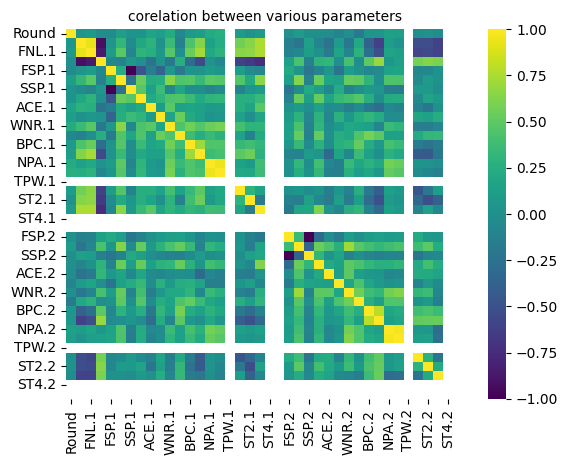

In [1]:
import pandas as pd
df=pd.read_csv('/content/Wimbledon-women-2013.csv')
covariance_matrix = pd.DataFrame(df.corr())
print("Correlation matrix is : ")
print(covariance_matrix)



import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(covariance_matrix, cmap=sns.color_palette("viridis", as_cmap=True))


plt.title('corelation between various parameters', fontsize = 10)

plt.show()

In [ ]:
a=covariance_matrix["Result"]
b=a.sort_values(ascending=True, inplace=False)
print(b)

FNL.2    -0.913940
ST5.2    -0.805609
BPW.2    -0.715185
BPC.2    -0.596371
ST3.2    -0.577760
ST2.2    -0.575809
ST4.2    -0.504317
ST1.2    -0.462658
ACE.2    -0.334428
WNR.2    -0.302885
SSP.1    -0.250266
UFE.1    -0.248728
NPW.2    -0.148848
FSW.2    -0.116951
DBF.1    -0.090449
SSW.2    -0.083403
Round    -0.062208
FSP.2    -0.054471
NPA.2    -0.000222
SSP.2     0.054471
NPA.1     0.068167
SSW.1     0.075514
NPW.1     0.128324
FSW.1     0.142591
UFE.2     0.154742
DBF.2     0.219954
FSP.1     0.250266
WNR.1     0.301725
ACE.1     0.305676
ST5.1     0.444500
ST1.1     0.483366
ST3.1     0.516165
BPC.1     0.518418
ST2.1     0.537916
ST4.1     0.557596
BPW.1     0.675129
FNL.1     0.913438
Result    1.000000
TPW.1          NaN
TPW.2          NaN
Name: Result, dtype: float64


In [4]:
import numpy as np
ex=np.mean(df['FNL.1'])
varx=np.var(df['FNL.1'])
ey=np.mean(df['Result'])
cov=np.cov(df['Result'], df['FNL.1'])[1][0]

a=cov/varx
b=ey-cov*ex/varx

y_pred=np.array((round(a*df['FNL.1']+b)))
y_actu=np.array(df["Result"])

print(y_pred)
from sklearn.metrics import accuracy_score
print("accurancy score of FNL:",accuracy_score(y_actu, y_pred))
print(f"Result=round({a}*FNL+{b})")


[-0. -0.  1.  1. -0.  0.  0.  1. -0.  1. -0.  1. -0.  1. -0.  1. -0.  1.
 -0.  1. -0.  1.  1.  1. -0.  1. -0.  1.  1. -0.  1. -0. -0.  0. -0.  1.
  0.  1. -0.  1.  1.  0.  1. -0.  0. -0.  0.  1. -0.  1.  0.  0. -0.  0.
  1. -0. -0.  1.  1.  1.  1.  1.  1.  1.  1. -0. -0.  1.  1.  0.  1.  0.
  1.  1.  1.  1. -0.  1.  0.  1. -0.  1.  1.  1.  1.  1.  1. -0.  1.  1.
  1.  0. -0.  1.  0.  1.  1.  0. -0.  0.  1.  1.  1. -0.  1.  1.  1.  1.
  1.  1.  0. -0.  1. -0.  0.  0. -0.  1.  1.  1.  1. -0.]
accurancy score of FNL: 1.0
Result=round(0.5323848258094395*FNL+-0.12284641946437436)


In [8]:
ex=np.mean(df['BPW.1'])
varx=np.var(df['BPW.1'])
ey=np.mean(df['Result'])
cov=np.cov(df['Result'], df['BPW.1'])[1][0]

a=cov/varx
b=ey-cov*ex/varx

y_pred=np.array((round(a*df['BPW.1']+b)))
y_actu=np.array(df["Result"])

from sklearn.metrics import accuracy_score
print("accurancy score of BPW:",accuracy_score(y_actu, y_pred))
print(f"Result=round({a}*BPW+{b})")

accurancy score of BPW: 0.7704918032786885
Result=round(0.15837048716833407*BPW+-0.00122202097847246)


In [7]:
ex=np.mean(df['FSW.1'])
varx=np.var(df['FSW.1'])
ey=np.mean(df['Result'])
cov=np.cov(df['Result'], df['FSW.1'])[1][0]

a=cov/varx
b=ey-cov*ex/varx

y_pred=np.array((round(a*df['FSW.1']+b)))
y_actu=np.array(df["Result"])

print(y_pred)

from sklearn.metrics import accuracy_score
print("accurancy score of FSW:",accuracy_score(y_actu, y_pred))
print(f"Result=round({a}*FSW+{b})")

[0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 0.]
accurancy score of FSW: 0.6065573770491803
Result=round(0.016456160797965576*FSW+0.06817484093815374)


In [6]:
ex=np.mean(df['WNR.1'])
varx=np.var(df['WNR.1'])
ey=np.mean(df['Result'])
cov=np.cov(df['Result'], df['WNR.1'])[1][0]

a=cov/varx
b=ey-cov*ex/varx

y_pred=np.array((round(a*df['WNR.1']+b)))
y_actu=np.array(df["Result"])

print(y_pred)

from sklearn.metrics import accuracy_score
print("accurancy score of WNR:",accuracy_score(y_actu, y_pred))
print(f"Result=round({a}*WNR+{b})")


[0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
accurancy score of WNR: 0.6721311475409836
Result=round(0.02058998660000437*WNR+0.09906971916219964)


In [5]:
ex=np.mean(df['NPA.1'])
varx=np.var(df['NPA.1'])
ey=np.mean(df['Result'])
cov=np.cov(df['Result'], df['NPA.1'])[1][0]

a=cov/varx
b=ey-cov*ex/varx

y_pred=np.array((round(a*df['NPA.1']+b)))
y_actu=np.array(df["Result"])

print(y_pred)

from sklearn.metrics import accuracy_score
print("accurancy score of NPA:",accuracy_score(y_actu, y_pred))
print(f"Result=round({a}*NPA+{b})")

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
accurancy score of NPA: 0.5327868852459017
Result=round(0.007013279152192498*NPA+0.436680431960322)


UNANSWERABLE

In [ ]:
import numpy as np
lis=["FNL.2","ST5.2","BPW.2","BPC.2","ST3.2","ST2.2","ST4.2","ST1.2","ACE.2","WNR.2","FSP.1","WNR.1","ACE.1","ST5.1","ST1.1","ST3.1","BPC.1","ST2.1","ST4.1","BPW.1","FNL.1"]
lis2=[]
for i in lis:
  lis2.append(f"df['{i}']")
np.array(lis2)

array(["df['FNL.2']", "df['ST5.2']", "df['BPW.2']", "df['BPC.2']",
       "df['ST3.2']", "df['ST2.2']", "df['ST4.2']", "df['ST1.2']",
       "df['ACE.2']", "df['WNR.2']", "df['FSP.1']", "df['WNR.1']",
       "df['ACE.1']", "df['ST5.1']", "df['ST1.1']", "df['ST3.1']",
       "df['BPC.1']", "df['ST2.1']", "df['ST4.1']", "df['BPW.1']",
       "df['FNL.1']"], dtype='<U11')

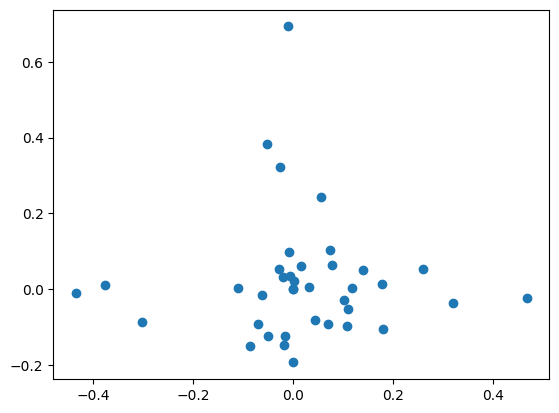

In [ ]:
new=covariance_matrix.drop(index=['TPW.1', "TPW.2"], columns=['TPW.1', "TPW.2"])
w, v = np.linalg.eig(new)
lis=[]
for i in range(len(w)):
  lis.append((w[i],v[i]))
lis.sort(key=lambda x: x[0], reverse=True)
x=lis[0][1]
y=lis[1][1]
coordinates=np.array(list(zip(x, y)))

coordinates

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

In [ ]:
res=pd.DataFrame(df["Result"])

print(res.corrwith(pd.Series(x), method='kendall'))

Result    0.107341
dtype: float64


In [ ]:
df_new_positive=df[["Result","FNL.2","ST5.2","BPW.2","BPC.2","ST3.2","ST2.2","ST4.2","ST1.2","ACE.2","WNR.2"]].copy()
df_new_negative=df[["Result","FSP.1","WNR.1","ACE.1","ST5.1","ST1.1","ST3.1","BPC.1","ST2.1","ST4.1","BPW.1","FNL.1"]].copy()